In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [16]:
N, k, l, x0, y0, t = sp.symbols('N, k, l, x0, y0, t')

In [3]:
def beta_x0_min_1(k, l, x0):
    return (k*x0/l - 1.0)

In [4]:
def rad_q(k, l, x0, y0):
    beta = k/l
    arg =  beta_x0_min_1(k, l, x0)**2 + 2.0*x0*y0*beta**2
    return sp.sqrt(arg)

In [5]:
def phi(k, l, x0, y0):
    arg = beta_x0_min_1(k, l, x0) / rad_q(k, l, x0, y0)
    return 1.0/sp.tanh(arg)

In [39]:
def z(params, t):
    k, l, x0, y0 = params
    inv_beta = l/k
    arg_tanh = 0.5*l*t*rad_q(k, l, x0, y0) - phi(k, l, x0, y0)
    arg_1 = beta_x0_min_1(k, l, x0)
    arg_2 = rad_q(k, l, x0, y0)*sp.tanh(arg_tanh)
#     z = (inv_beta**2)/x0*(arg_1 + arg_2)
    z = (arg_1 + arg_2)
    return z

In [40]:
def x(params, t):
    k, l, x0, y0 = params
    exp_arg = -k/l*z(params, t)
    x = x0*sp.exp(exp_arg)
    return x

In [41]:
def y(params, t):
    N = params[0]
    y = N - x(params[1:], t) - z(params[1:], t)
    return y
    

In [42]:
f_z = sp.lambdify(([k, l, x0, y0], t), z([k, l, x0, y0], t), "numpy")
f_x = sp.lambdify(([k, l, x0, y0], t), x([k, l, x0, y0], t), "numpy")
f_y = sp.lambdify(([N, k, l, x0, y0], t), y([N, k, l, x0, y0], t), "numpy")

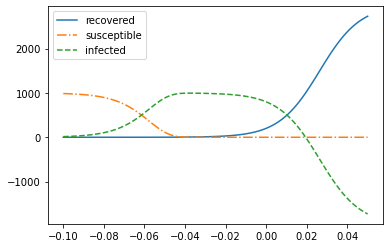

In [58]:
params_x_z = [0.1, 0.067, 1000.0, 0.0]
params_y = [1000] + params_x_z
times = np.linspace(-0.1, 0.05, 100)
plt.plot(times,f_z(params_x_z, times), '-', label="recovered")
plt.plot(times,f_x(params_x_z, times), '-.', label="susceptible")
plt.plot(times,f_y(params_y, times), '--', label="infected")
plt.legend()